<a href="https://colab.research.google.com/github/derek-shing/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO

import pandas as pd


column = range(1,17)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, names=column)

In [0]:
import numpy as np

In [12]:
df.describe()

,3,8,11,15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [13]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [15]:
df[16].value_counts()  #Number of appovered cases (307) and rejected cases(383) match the dataset

-    383
+    307
Name: 16, dtype: int64

In [16]:
df.isnull().sum() # No null value in the dataframe

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [39]:
df.info() #column 2,3, 8,11,14,15 should be continuous, but column 2, 14 is object in our dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
1     690 non-null object
2     678 non-null object
3     690 non-null float64
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null object
8     690 non-null float64
9     690 non-null object
10    690 non-null object
11    690 non-null int64
12    690 non-null object
13    690 non-null object
14    677 non-null object
15    690 non-null int64
16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [0]:
df[2].value_counts()

In [44]:
type(df[2][0])

numpy.float64

In [45]:
type(df[14][0])

str

In [0]:
df[14].value_counts()

In [0]:
df[14]=df[14].replace('?',np.nan)

In [0]:
df[2]=df[2].replace('?',np.nan)

In [0]:
df[2]=df[2].astype(float)

In [0]:
df[14]=df[14].astype(float)

In [47]:
df.describe()

,2,3,8,11,14,15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [0]:
df.isna().sum()

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# TODO
groups=df.groupby(16)

In [0]:
approved = groups.get_group('+')
rejected = groups.get_group('-')

In [0]:
import seaborn as sns
from scipy import stats as s

In [0]:

plot_df=df.replace(np.nan,0)

In [68]:
approved.describe()

,2,3,8,11,14,15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [69]:
rejected.describe()

,2,3,8,11,14,15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [0]:
#Choose column 11 to run the t test as it seem to be different in 2 group

In [0]:
result_A11 = s.ttest_1samp(approved[11],rejected[11].mean())

In [77]:
result_A11

Ttest_1sampResult(statistic=11.017026357173894, pvalue=5.37258502555153e-24)

In [0]:
#Choose column 2 to run the t test as it seem to be not much different in 2 group

In [0]:
result_A2 = s.ttest_1samp(approved[2],rejected[2].mean(),nan_policy='omit')

In [97]:
result_A2

Ttest_1sampResult(statistic=5.333850227091324, pvalue=1.8807250167867325e-07)

**Both A2 and A11 is "statistically significantly" higher in the approved group. However,  A11 is more extreme**

In [0]:
class_A9=pd.crosstab(df[16],df[9]) #crosstab compare the class(+/-) vs A9

In [117]:
class_A9

9,f,t
16,,
+,23,284
-,306,77


In [0]:
chi2, p, dof, ex = s.chi2_contingency(class_A9)

In [115]:
print(chi2,p)

355.2038167412799 3.1185900878457007e-79


**A9 is related to the class(approve/reject) as it has small p value**

In [0]:
class_A1=pd.crosstab(df[16],df[1]) #crosstab compare the class(+/-) vs A1

In [120]:
class_A1

1,?,a,b
16,,,
+,3,98,206
-,9,112,262


In [0]:
chi2, p, dof, ex = s.chi2_contingency(class_A1)

In [122]:
print(chi2,p)

2.2909673396997023 0.3180700396919805


**The class(approve/reject) is not so related to A1 as it has the p value 0.318, which is high.**

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

The two tests I ran is to compare the distribution of mean of two attribute in 2 groups, the approved group and the rejected group. Base on the tests result, the group 'approved' will have higher number of both attritbue 2 and 11 with confidence level more than 99.9%. However the difference is more extreme is attribute 11 compare with attribute 2 as the p value is much lower in the test for attribute 11.

The two Chi-squared tests I ran are to test if there is a relationship between the class and the selected attribute(A1 & A9), lower p value mean they are more related and higher p value mean they are more independent. By the test result, A9 is related to the class and  A1 is not. We may see the difference in the figuare below. Value 't' in attribute 9 will result in more approved case.

In [125]:
class_A1

1,?,a,b
16,,,
+,3,98,206
-,9,112,262


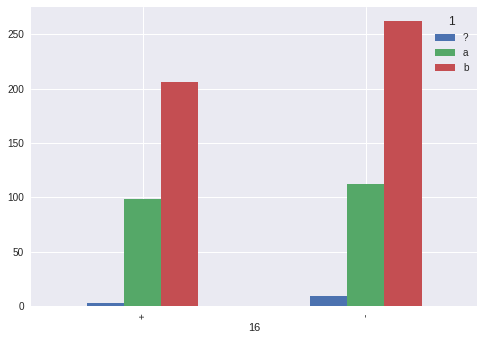

In [129]:
class_A1.plot.bar()

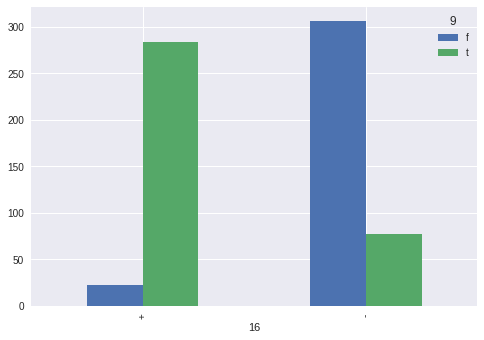

In [130]:
class_A9.plot.bar()